## Vou demonstrar os dados acerca dos dividendos pagos pelas empresas do Portfólio arrojado aos detentores das ações no intervalo de datas considerado nesse projeto

## Alguns insights a partir desses dados:
### *   Empresas como Petrobrás, WEG, Renner, Cyrela e Fleury adotaram uma política de dividendos de pagamento em todos os anos considerados. O que é normal: empresas de capital aberto costumam pagar dividendos 4 vezes ao ano -- e às vezes um extraordinário.


### *   Dentre as 5 empresas que pagam dividendos todos os anos praticamente, a política de dividendos dessas empresas parece acompanhar as suas respectivas margens de lucro trimestral.


### * Caso da WEG:
#### Essa possui um padrão interessante nos últimos anos: seu lucro líquido tem crescido ano a ano e seu dividendo acompanha esse crescimento do lucro líquido. Um olhar rápido e desantento imaginaria que a empresa se esforça para pagar dividendos mais elevados ano a ano, mas na verdade parece que ela segue o mesmo padrão das outras, mas o lucro dela tem crescido ano após ano.

In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Definir o intervalo de datas: de 08/08/2018 até 12/06/2024.
start = dt.datetime(2018, 8, 8)
end = dt.datetime(2024, 6, 12)

# Lista de tickers das empresas

#Portfólio mais Arrojado:
tickers_a = [
    'COGN3.SA',  # Cogna
    'CYRE3.SA',  # Cyrela
    'FLRY3.SA',  # Fleury
    'PRIO3.SA',  # PetroRio
    'BRKM5.SA',   # Braskem
    'LREN3.SA',  # Lojas Renner
    'PETR4.SA',  # Petrobras
    'WEGE3.SA',  # Weg
]

# Função para baixar e somar os dividendos
def dados_dividendos(tickers):
    dividendos = pd.DataFrame()
    for ticker in tickers:
        try:
            empresa = yf.Ticker(ticker)
            dados_div = empresa.dividends.reset_index()
            dados_div['Ticker'] = ticker
            dados_div['Date'] = dados_div['Date'].dt.tz_localize(None)
            dividendos = pd.concat([dividendos, dados_div], ignore_index=True)
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    # Calcular a soma dos dividendos por empresa
    soma_dividendos = dividendos.groupby(['Date', 'Ticker'])['Dividends'].sum().reset_index()
    return soma_dividendos, dividendos

In [47]:
div_a, dividendos_info = dados_dividendos(tickers_a)


In [48]:
print(dividendos_info)

          Date  Dividends    Ticker
0   2013-03-21   0.041797  COGN3.SA
1   2013-04-23   0.014177  COGN3.SA
2   2013-05-15   0.038179  COGN3.SA
3   2013-08-09   0.022069  COGN3.SA
4   2013-11-08   0.028388  COGN3.SA
..         ...        ...       ...
313 2023-07-24   0.145202  WEGE3.SA
314 2023-09-25   0.059824  WEGE3.SA
315 2023-12-18   0.071941  WEGE3.SA
316 2024-02-26   0.297943  WEGE3.SA
317 2024-03-25   0.057765  WEGE3.SA

[318 rows x 3 columns]


In [49]:
# Filtrar o DataFrame original para incluir apenas as datas dentro do período de tempo desejado
dividendos_info = dividendos_info.loc[(dividendos_info['Date'] >= start) & (dividendos_info['Date'] <= end)]

print(dividendos_info)

          Date  Dividends    Ticker
21  2018-08-21   0.109154  COGN3.SA
22  2018-11-19   0.081225  COGN3.SA
23  2019-04-05   0.026387  COGN3.SA
24  2019-05-22   0.055537  COGN3.SA
25  2019-08-21   0.033692  COGN3.SA
..         ...        ...       ...
313 2023-07-24   0.145202  WEGE3.SA
314 2023-09-25   0.059824  WEGE3.SA
315 2023-12-18   0.071941  WEGE3.SA
316 2024-02-26   0.297943  WEGE3.SA
317 2024-03-25   0.057765  WEGE3.SA

[117 rows x 3 columns]


In [50]:
# Reestruturando o DataFrame dividendos_info
dados_div_pivot = dividendos_info.pivot_table(index='Date', columns='Ticker', values='Dividends', aggfunc='sum').fillna(0)

print(dados_div_pivot)

Ticker      BRKM5.SA  COGN3.SA  CYRE3.SA  FLRY3.SA  LREN3.SA  PETR4.SA  \
Date                                                                     
2018-08-14       0.0  0.000000  0.000000  0.000000  0.000000  0.050000   
2018-08-21       0.0  0.109154  0.000000  0.000000  0.000000  0.000000   
2018-09-24       0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-09-25       0.0  0.000000  0.000000  0.000000  0.065334  0.000000   
2018-11-19       0.0  0.081225  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2024-03-20       0.0  0.000000  0.000000  0.147614  0.150290  0.000000   
2024-03-25       0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-04-26       0.0  0.000000  0.596783  0.000000  0.000000  1.141431   
2024-05-03       0.0  0.000000  0.000000  0.000000  0.000000  1.764165   
2024-06-12       0.0  0.000000  0.000000  0.000000  0.000000  1.041612   

Ticker      PRIO3.SA  WEGE3.SA  
Date

<ipython-input-51-d1e39ae8dd39>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dados_div_pivot, ci=None)


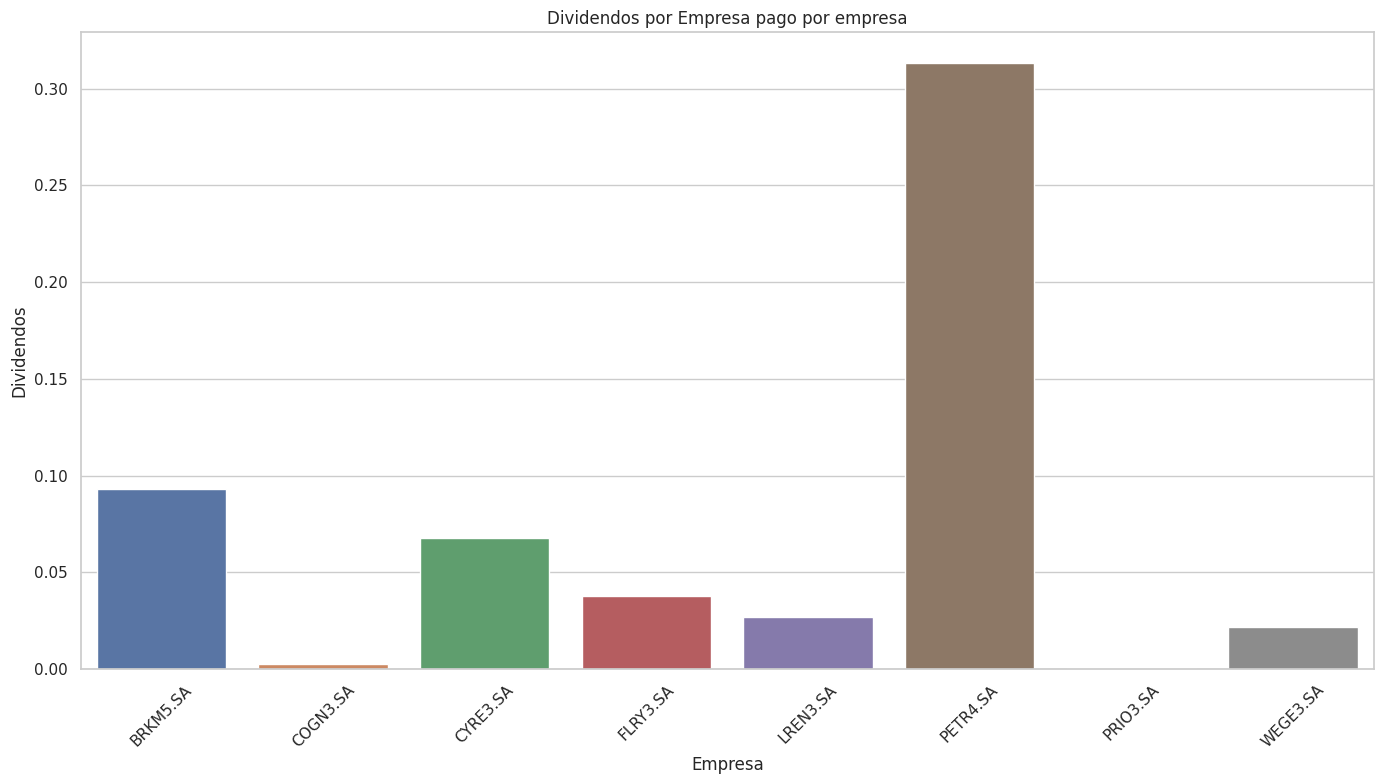

In [51]:
# Configurações de estilo do Seaborn
sns.set_theme(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=dados_div_pivot, ci=None)
plt.title('Dividendos por Empresa pago por empresa')
plt.xlabel('Empresa')
plt.ylabel('Dividendos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


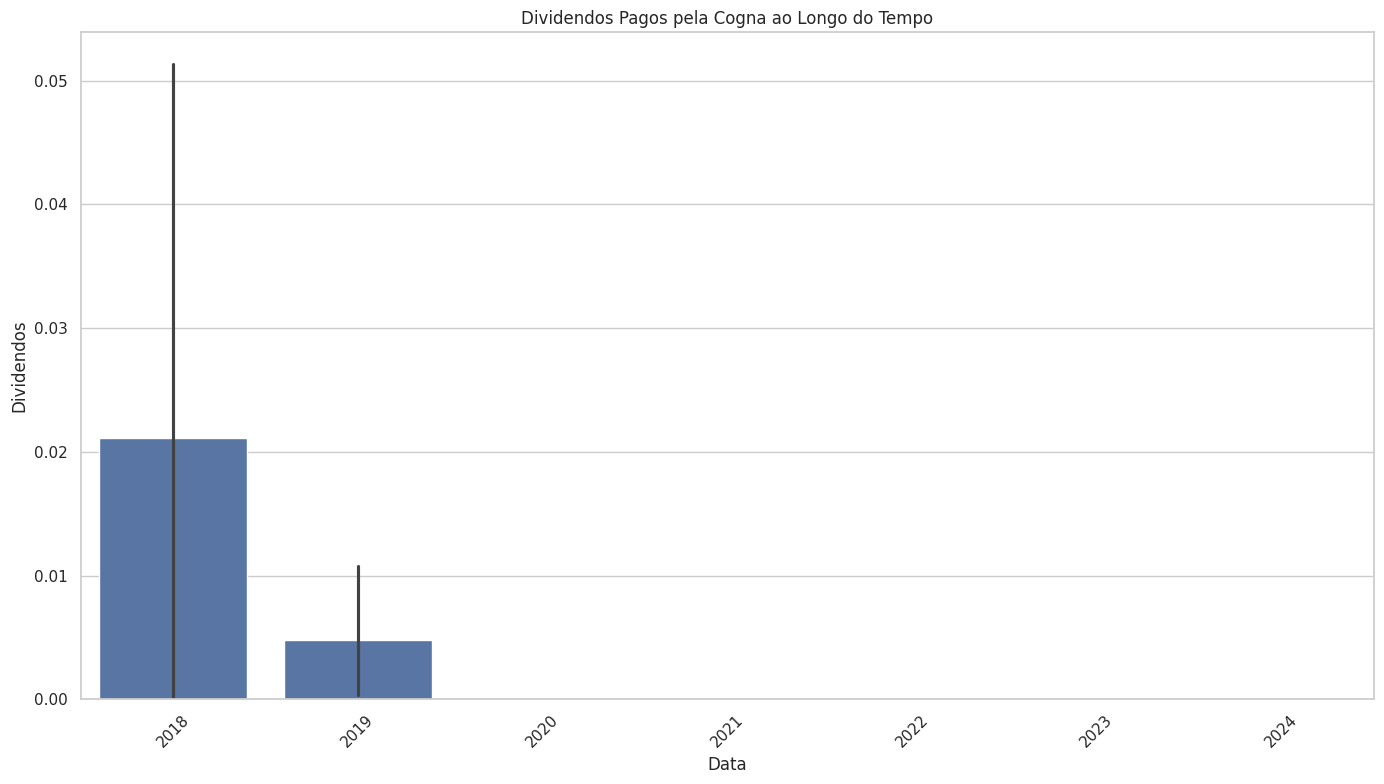

In [6]:
# Configurações de estilo do Seaborn
sns.set_theme(style="whitegrid")

# Filtrar os dividendos apenas para a empresa 'COGN3.SA'
div_cogn = dados_div_pivot['COGN3.SA']

# Criar o gráfico de linha para 'BRKM5.SA'
plt.figure(figsize=(14, 8))
sns.barplot(x=div_cogn.index.year, y=div_cogn.values)
plt.title('Dividendos Pagos pela Cogna ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Dividendos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



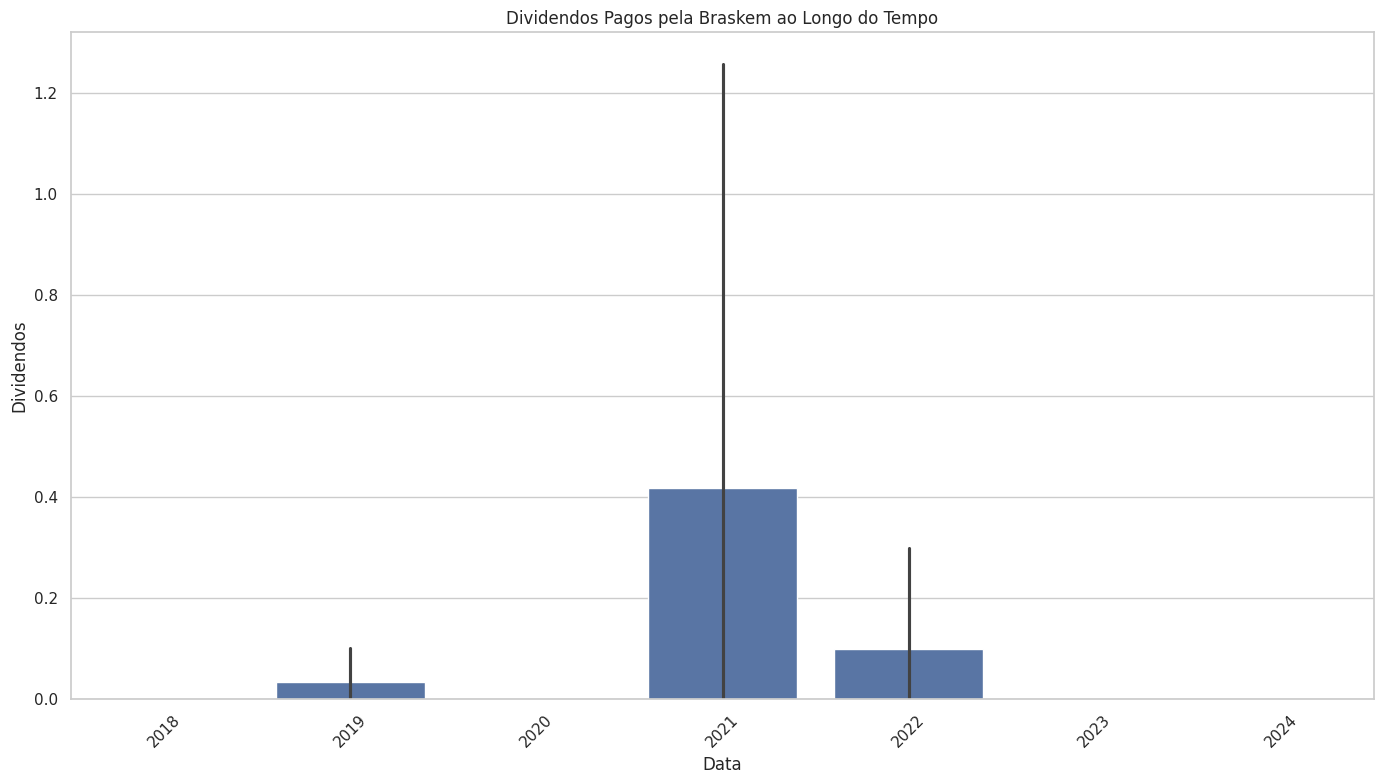

In [7]:
# Configurações de estilo do Seaborn
sns.set_theme(style="whitegrid")

# Filtrar os dividendos apenas para a empresa 'COGN3.SA'
div_brask = dados_div_pivot['BRKM5.SA']

# Criar o gráfico de linha para 'BRKM5.SA'
plt.figure(figsize=(14, 8))
sns.barplot(x=div_brask.index.year, y=div_brask.values)
plt.title('Dividendos Pagos pela Braskem ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Dividendos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


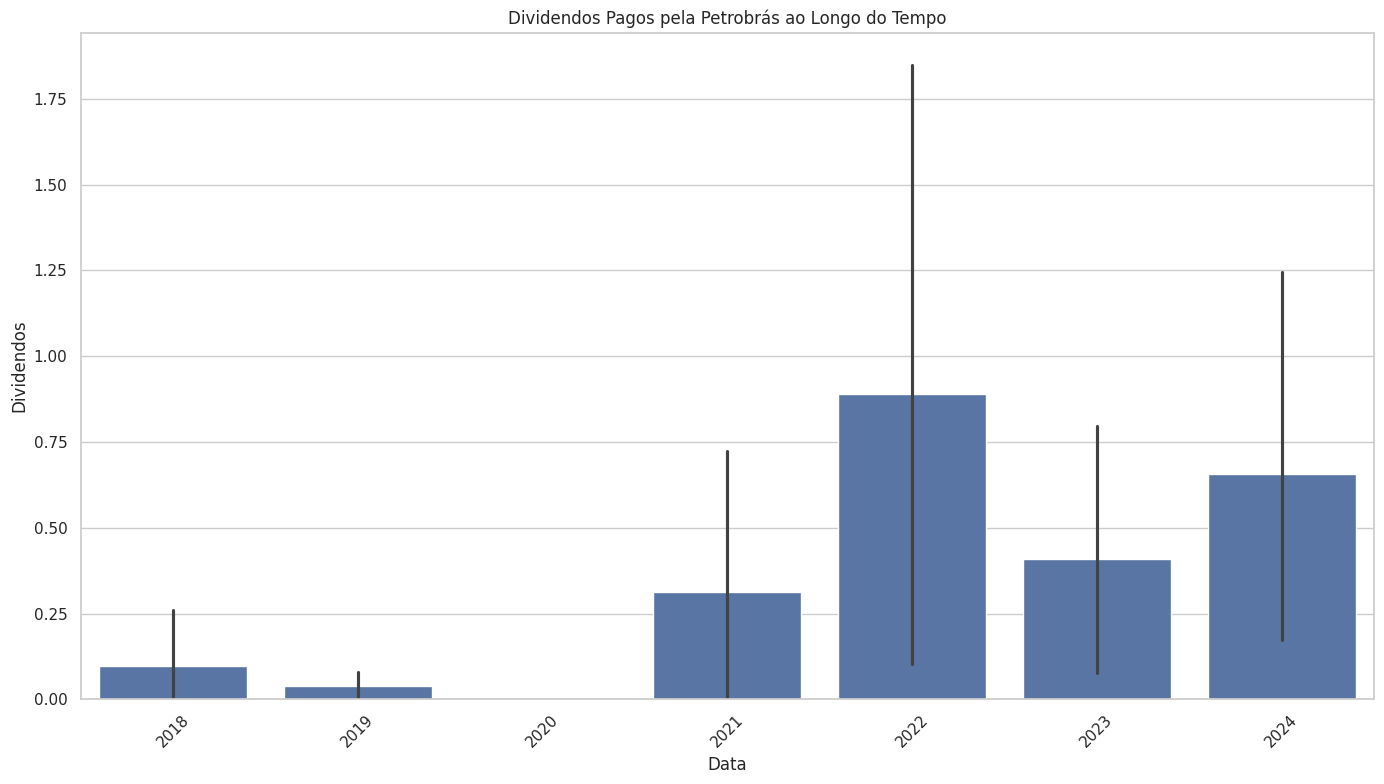

In [52]:
# Configurações de estilo do Seaborn
sns.set_theme(style="whitegrid")

# Filtrar os dividendos apenas para a empresa 'COGN3.SA'
div_petrobras = dados_div_pivot['PETR4.SA']

# Criar o gráfico de linha para 'COGN3.SA'
plt.figure(figsize=(14, 8))
sns.barplot(x=div_petrobras.index.year, y=div_petrobras.values)
plt.title('Dividendos Pagos pela Petrobrás ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Dividendos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

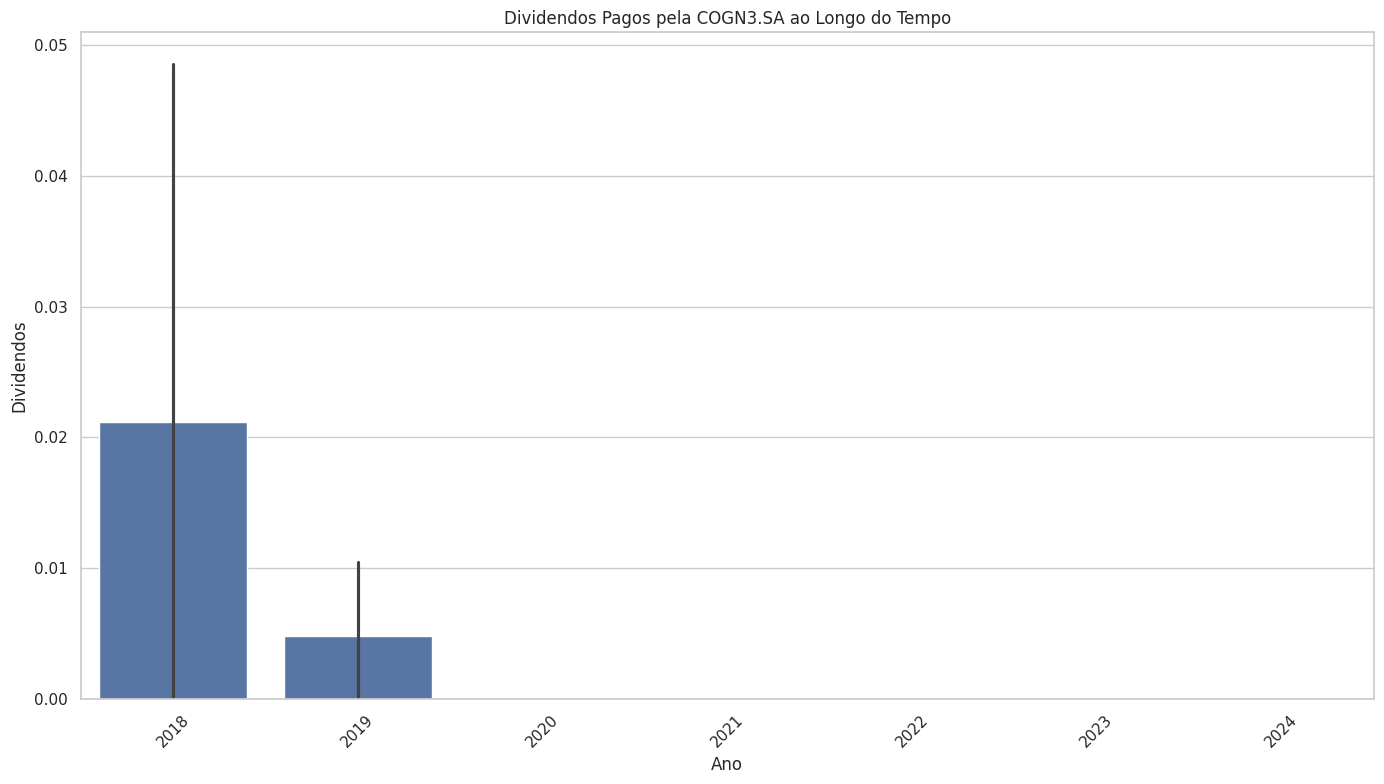

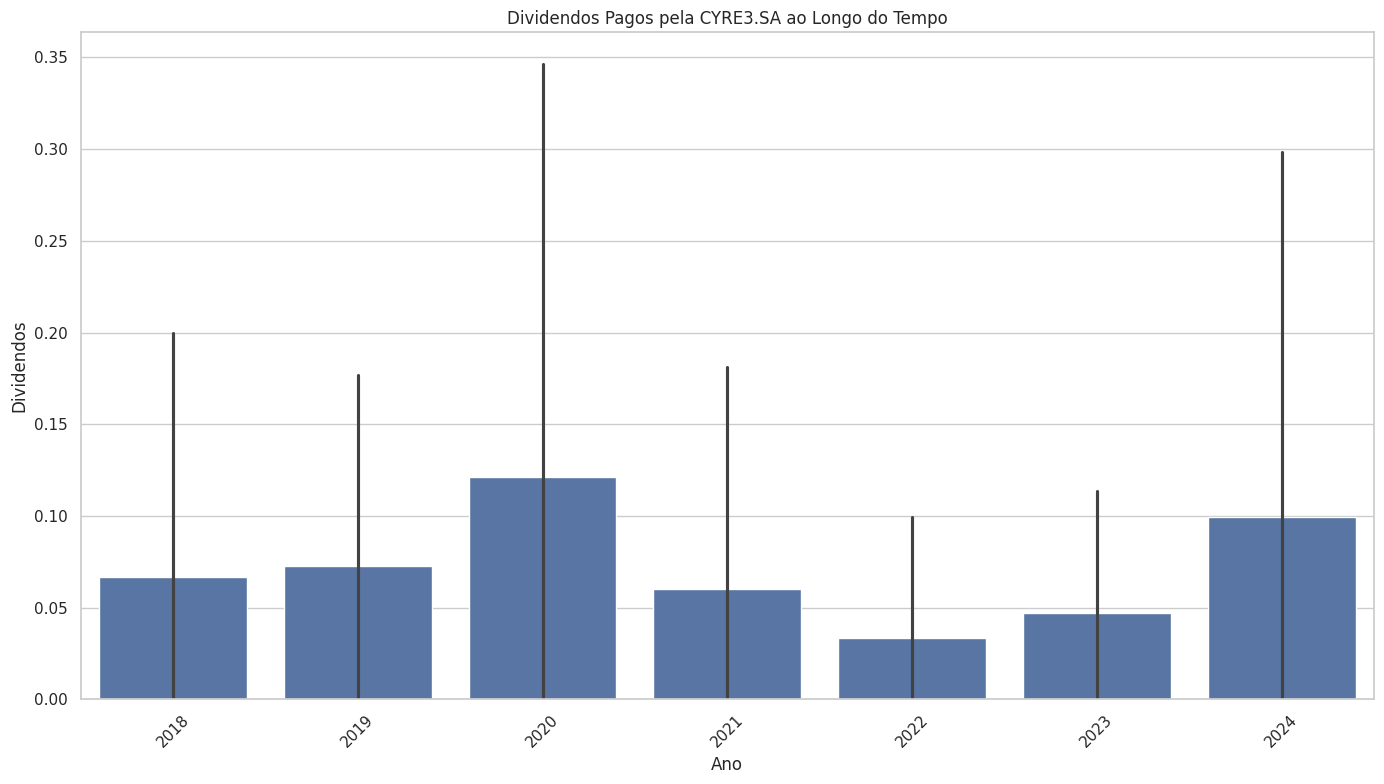

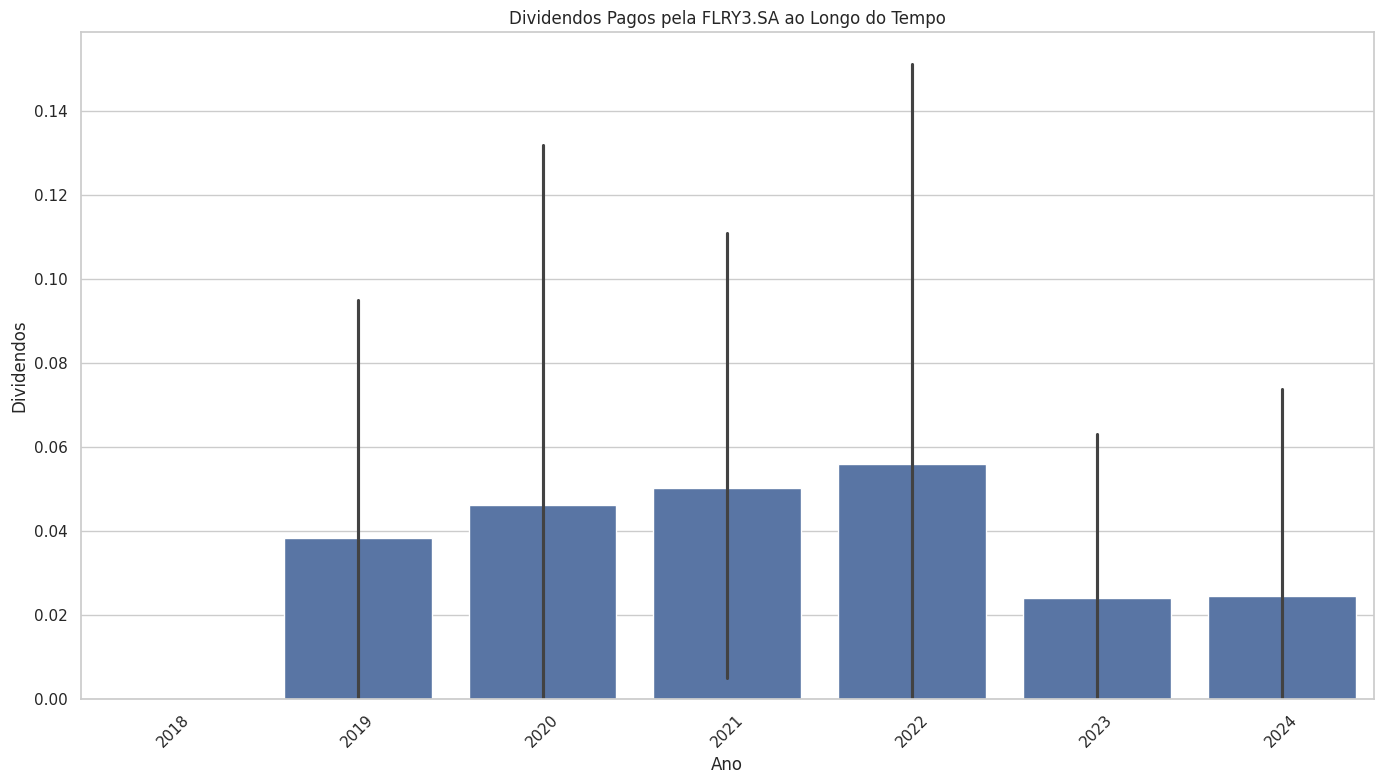

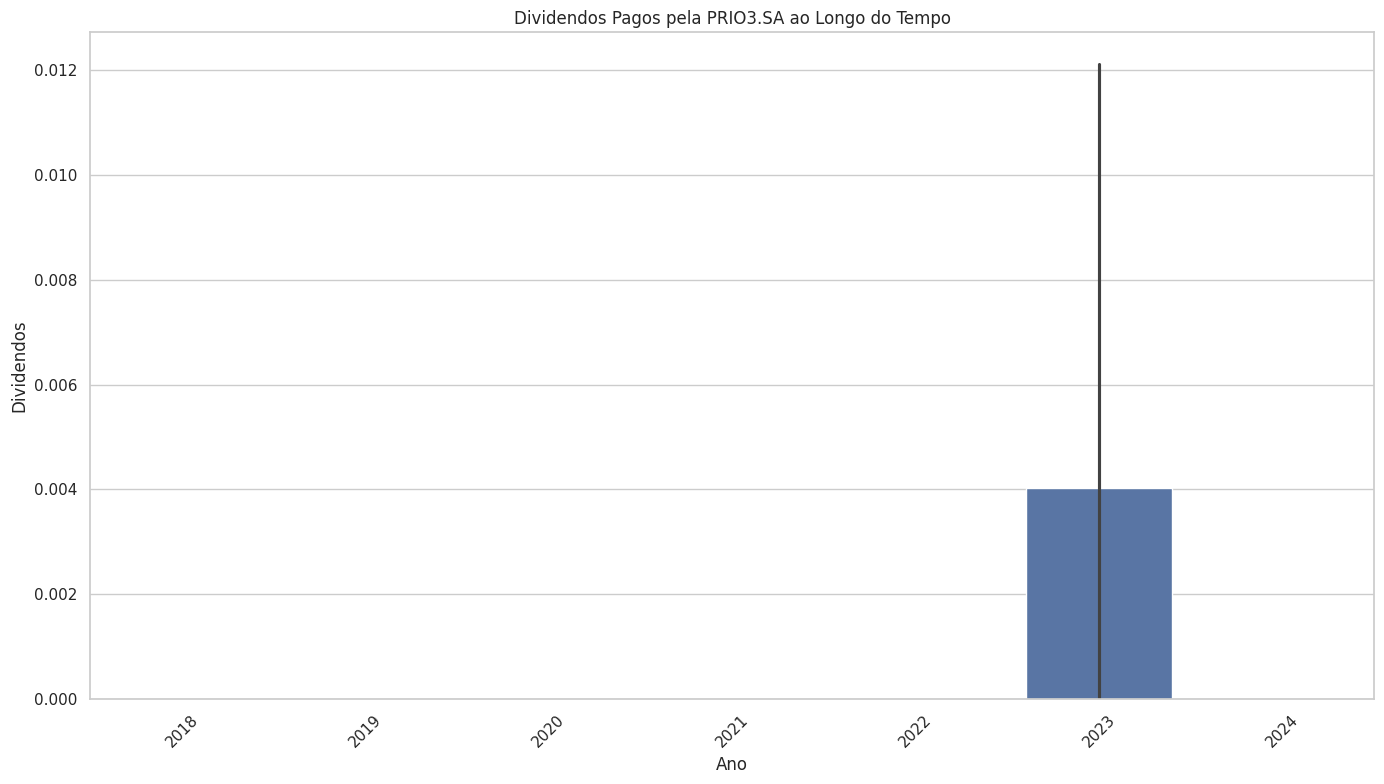

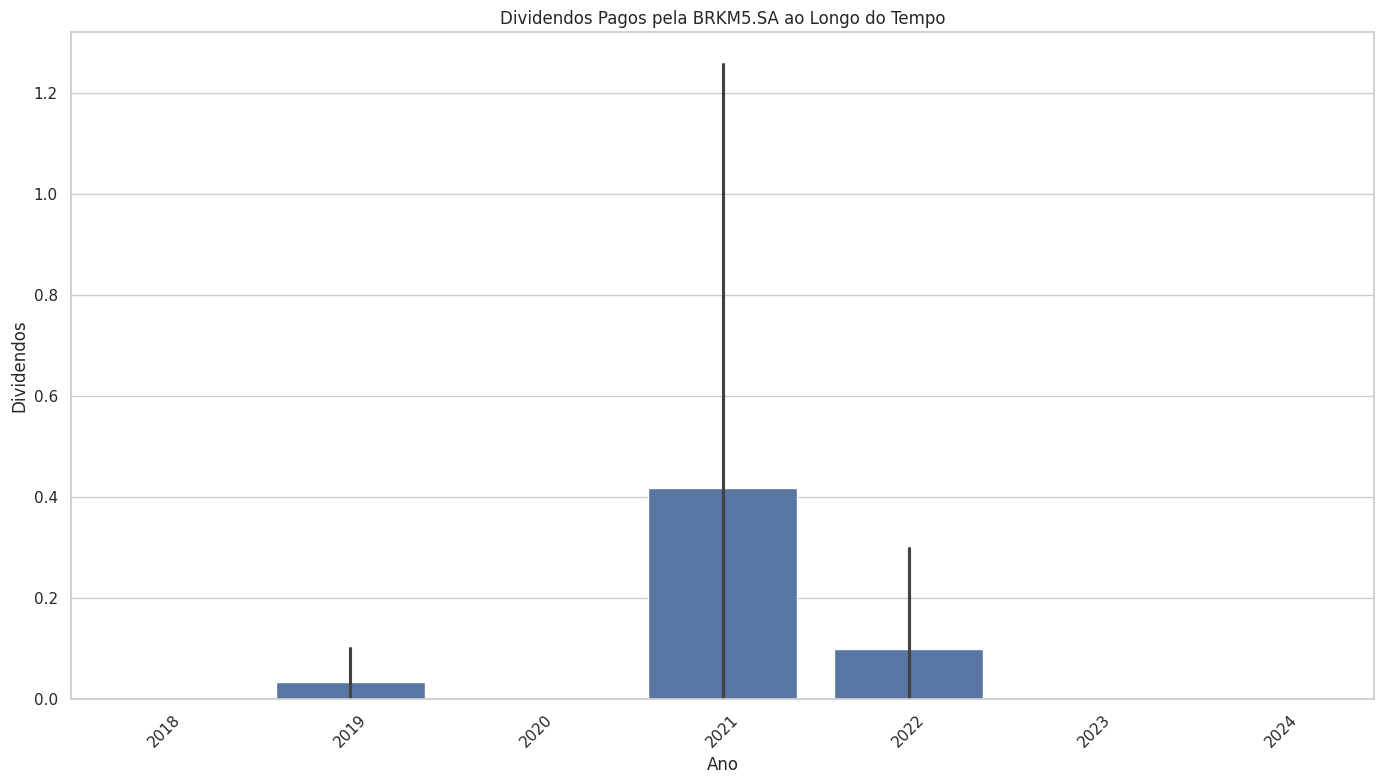

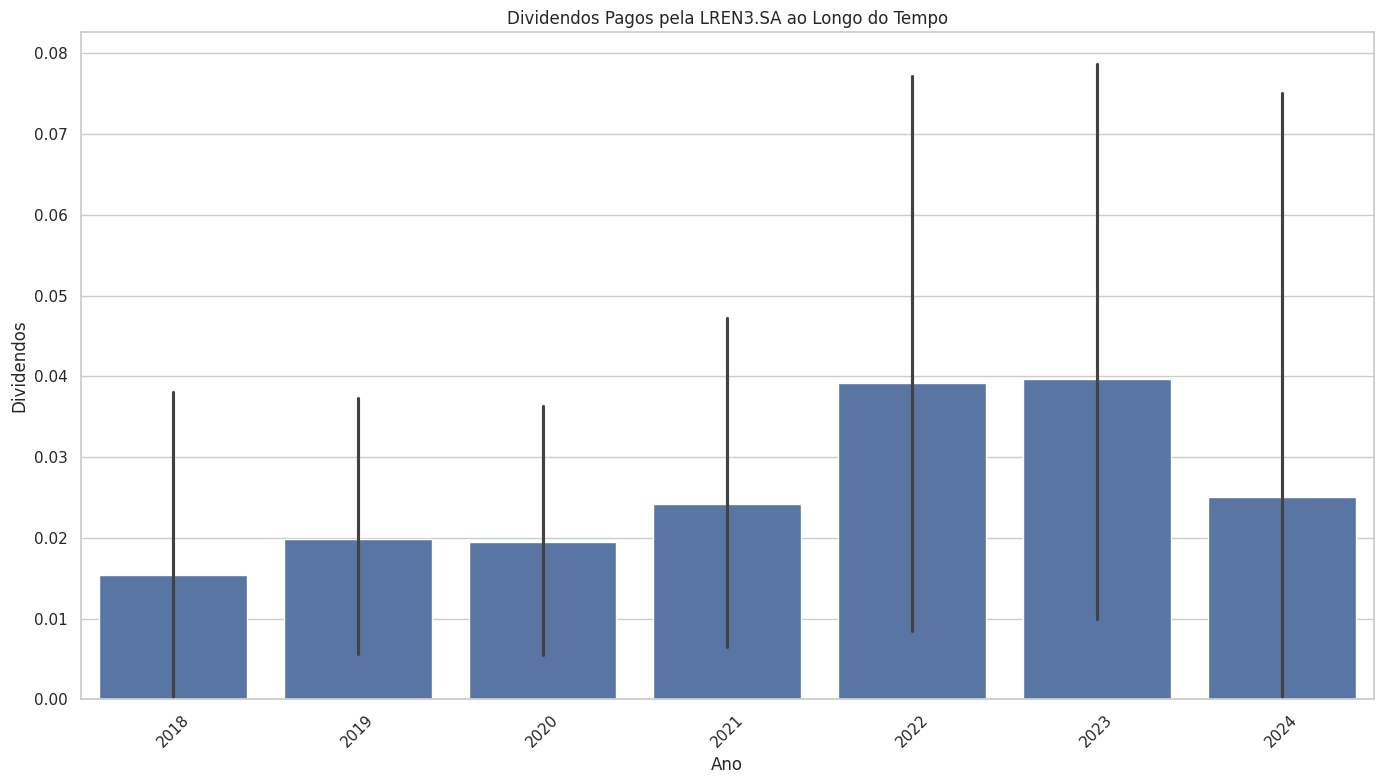

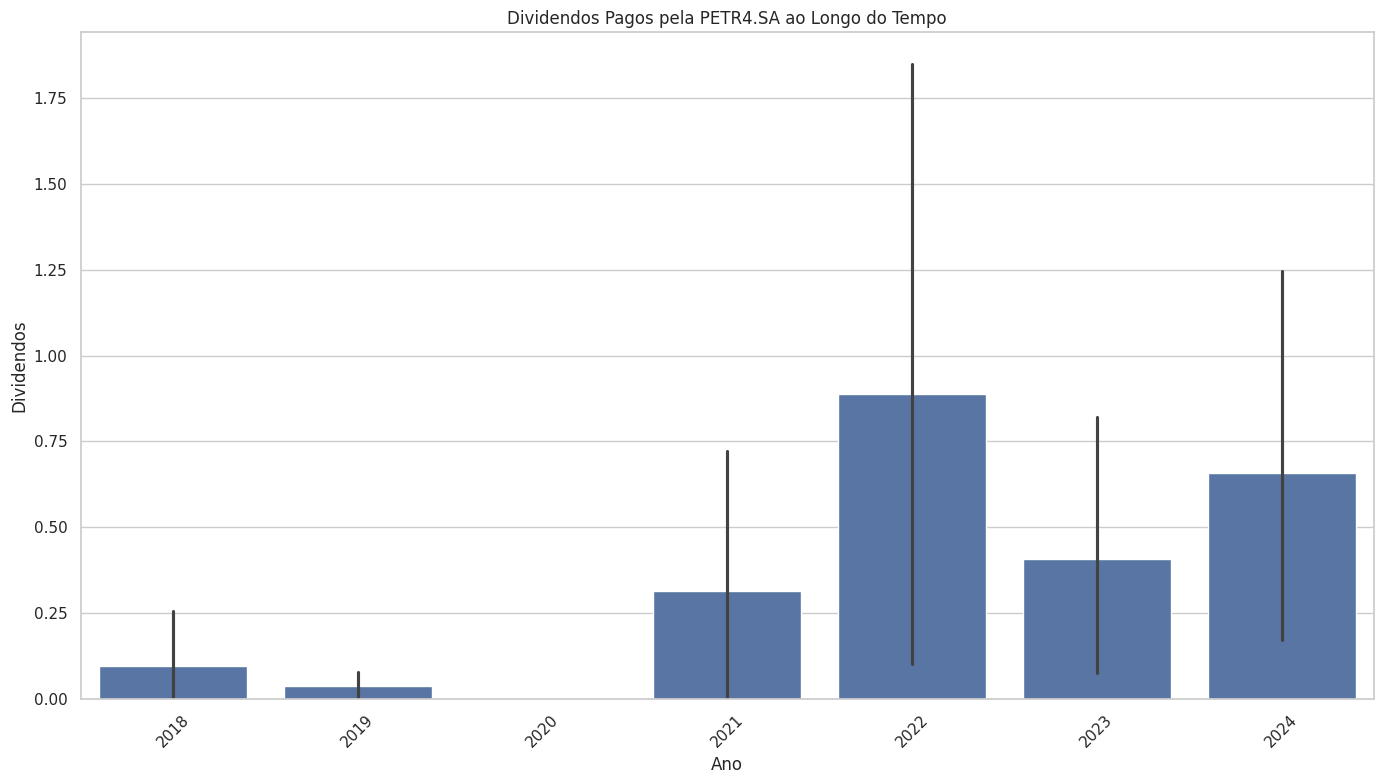

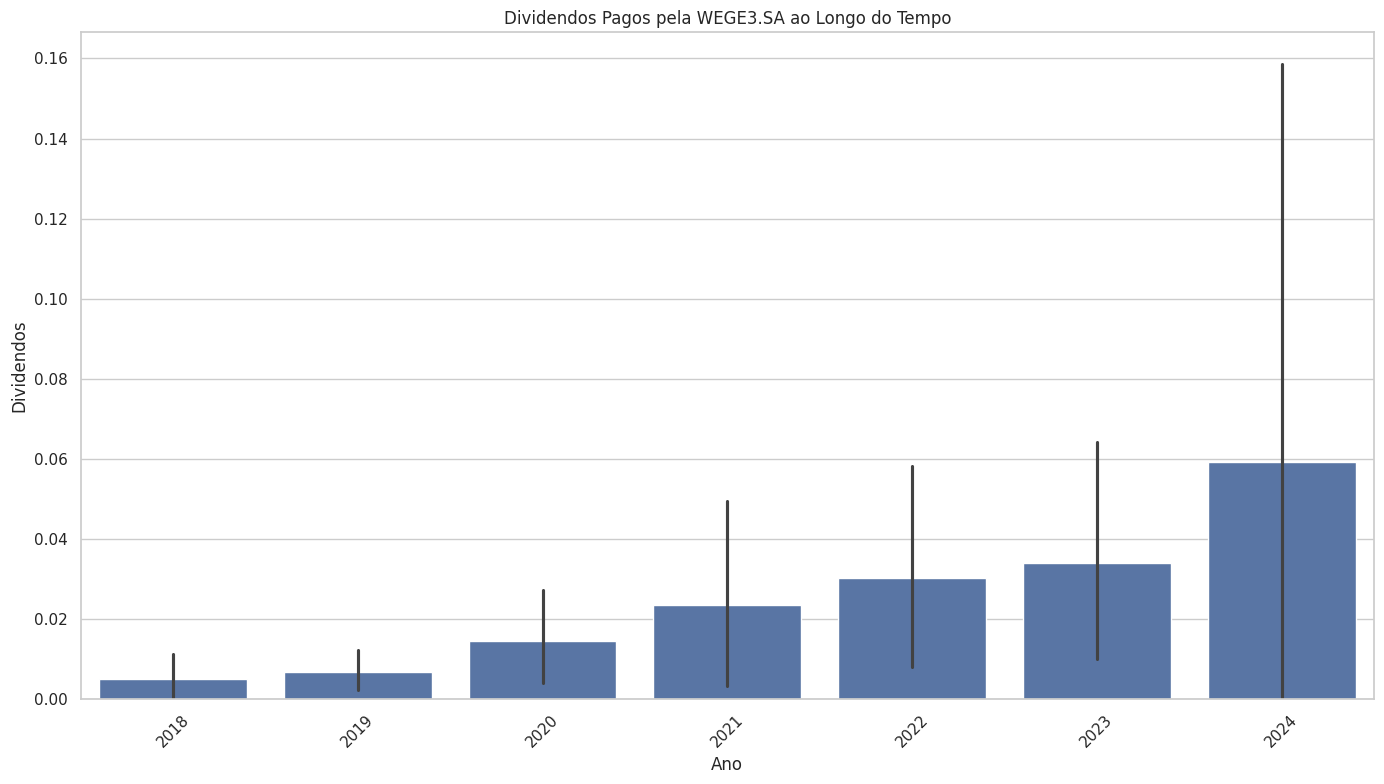

In [9]:
# Configurações de estilo do Seaborn
sns.set_theme(style="whitegrid")

for ticker in tickers_a:
    # Filtrar os dividendos apenas para a empresa atual do loop
    div = dados_div_pivot[ticker]

    # Criar o gráfico de barras para a empresa atual
    plt.figure(figsize=(14, 8))
    sns.barplot(x=div.index.year, y=div.values)
    plt.title(f'Dividendos Pagos pela {ticker} ao Longo do Tempo')
    plt.xlabel('Ano')
    plt.ylabel('Dividendos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [73]:
def DRE_PETROBRAS():
    # Lista de tickers das empresas
    tickers = ['PETR4.SA']
    df1 = []

    # Loop para baixar a Demonstração de Resultados do Exercício da empresa
    for ticker in tickers:
        ativo = yf.Ticker(ticker)
        dre = ativo.financials
        df1.append(dre.T)

    # Concatenar as Demonstrações de Resultados do Exercício em um único dataframe
    resultado = pd.concat(df1)
    resultado.reset_index(inplace=True)
    resultado.rename(columns={'index': 'Ano'}, inplace=True)

    # Renomeando os nomes das colunas para Receita Total e Lucro Líquido
    resultado.rename(columns={'Total Revenue': 'Receita Total', 'Net Income': 'Lucro Líquido'}, inplace=True)

    # Reconfigurando as datas para mostrar apenas os anos
    resultado['Ano'] = pd.to_datetime(resultado['Ano']).dt.year

    return resultado


# Chamar a função DRE e exibir o resultado
dre_resultadoP = DRE_PETROBRAS()
dre_resultadoP.head()



,Ano,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Rent And Landing Fees,Salaries And Wages,Gross Profit,Cost Of Revenue,Receita Total,Operating Revenue
0,2023,-273420000.0,0.294,53226000000.0,-930000000.0,-930000000.0,24884000000.0,13280000000.0,35887000000.0,52296000000.0,...,8278000000.0,20849347200.0,8278000000.0,NaN,4731000000.0,3547000000.0,53974000000.0,48435000000.0,102409000000.0,102409000000.0
1,2022,630382000.0,0.313,68040000000.0,2014000000.0,2014000000.0,36623000000.0,13218000000.0,47162000000.0,70054000000.0,...,7004000000.0,21082458600.0,7004000000.0,362000000.0,4349000000.0,2655000000.0,64988000000.0,59486000000.0,124474000000.0,124474000000.0
2,2021,-397281806.908769,0.291904,46258000000.0,-1361000000.0,-1361000000.0,19875000000.0,11695000000.0,32165000000.0,44897000000.0,...,6782000000.0,4229000000.0,6782000000.0,256000000.0,3798000000.0,2984000000.0,40802000000.0,43164000000.0,83966000000.0,83966000000.0
3,2020,-4959920000.0,0.34,31578000000.0,-14588000000.0,-14588000000.0,1141000000.0,11445000000.0,18403000000.0,16990000000.0,...,4516000000.0,21643437000.0,4516000000.0,252000000.0,4415000000.0,101000000.0,24488000000.0,29195000000.0,53683000000.0,53683000000.0
4,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1700000000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
print(dre_resultadoP)

    Ano Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
0  2023                -273420000.0              0.294     53226000000.0   
1  2022                 630382000.0              0.313     68040000000.0   
2  2021           -397281806.908769           0.291904     46258000000.0   
3  2020               -4959920000.0               0.34     31578000000.0   
4  2019                         NaN                NaN               NaN   

  Total Unusual Items Total Unusual Items Excluding Goodwill  \
0        -930000000.0                           -930000000.0   
1        2014000000.0                           2014000000.0   
2       -1361000000.0                          -1361000000.0   
3      -14588000000.0                         -14588000000.0   
4                 NaN                                    NaN   

  Net Income From Continuing Operation Net Minority Interest  \
0                                      24884000000.0           
1                             

In [65]:
dados_div_pivot.reset_index(inplace=True)

In [66]:
dados_div_pivot['Date'] = pd.to_datetime(dados_div_pivot['Date'])
dados_div_pivot['year'] = dados_div_pivot['Date'].dt.year

In [67]:
print(dados_div_pivot['year'])

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
103    2024
104    2024
105    2024
106    2024
107    2024
Name: year, Length: 108, dtype: int32


In [75]:
dre_resultadoP['Ano']

0    2023
1    2022
2    2021
3    2020
4    2019
Name: Ano, dtype: int32

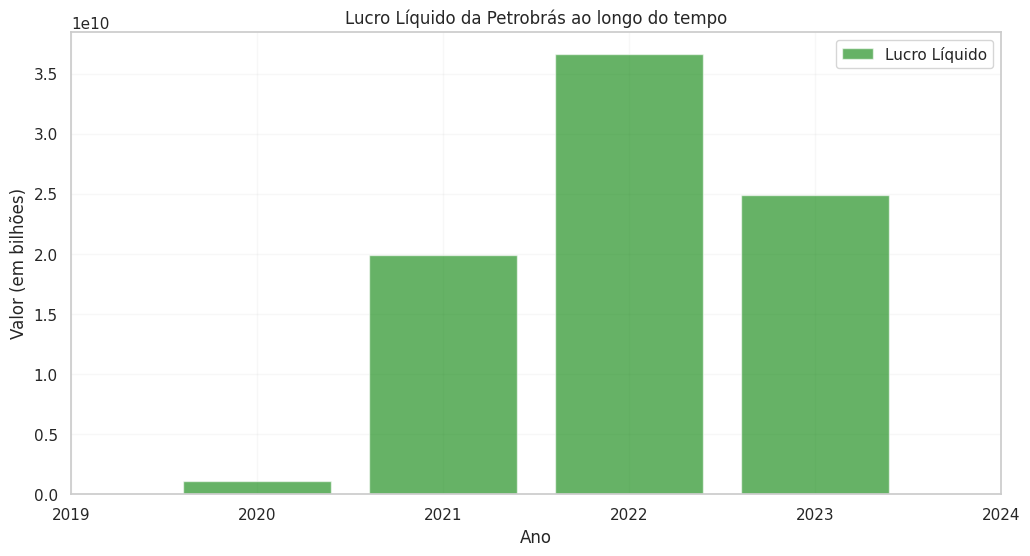

In [76]:
# Criar uma figura
plt.figure(figsize=(12, 6))

# Plotar os gráficos
plt.bar(dre_resultadoP['Ano'], dre_resultadoP['Lucro Líquido'], label='Lucro Líquido', color='green', alpha=0.6)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.title('Lucro Líquido da Petrobrás ao longo do tempo')

# Definir os limites do eixo x
plt.xlim(2019, 2024)

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.15)

# Mostrar o gráfico
plt.show()